In [2]:
### Example of erddap in pyferret

In [3]:
import pyferret

In [4]:
%load_ext ferretmagic

In [17]:
# list all datasets in an erddap server

In [16]:
%%ferret

yes? use "http://akutan.pmel.noaa.gov:8080/erddap/tabledap/allDatasets"
show data

SyntaxError: invalid syntax (<ipython-input-16-5c6d0c12ec54>, line 4)

In [4]:
%%ferret

yes? use "http://akutan.pmel.noaa.gov:8080/erddap/griddap/1hr_gridded_datasets_Mooring_19bsm2a_final"
show data

currently SET data sets:
 1> http://akutan.pmel.noaa.gov:8080/erddap/griddap/1hr_gridded_datasets_Mooring_19bsm2a_final (default)
 name title I J K L
 LATITUDE Latitude ... ... 1:15 1:3548
 LONGITUDE
 Longitude ... ... 1:15 1:3548
 TEMPERATURE
 Sea temperature in-situ ITS-90 ... ... 1:15 1:3548
 PRESSURE Sea water pressure, equals 0 at ... ... 1:15 1:3548
 SALINITY Sea Water Practical Salinity ... ... 1:15 1:3548
 PAR Downwelling Photosynthetic Phot ... ... 1:15 1:3548
 CHLOROPHYLL_FLUORESCENCE
 Concentration Of Chlorophyll In ... ... 1:15 1:3548
 OXYGEN_SATURATION
 ... ... 1:15 1:3548
 OXYGEN_CONCENTRATION
 ... ... 1:15 1:3548
 SERIAL_NUMBER
 Serial Number ... ... 1:15 1:3548


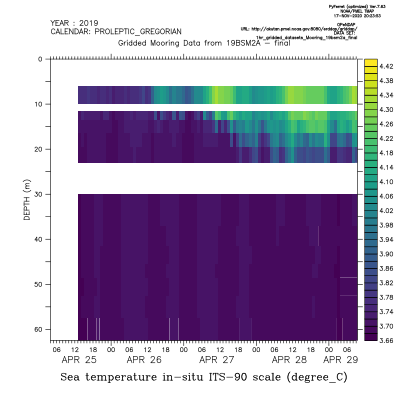

In [6]:
%%ferret -s 400,400

shade temperature[l=1:100]